**CIFAR dataset:**

The CIFAR dataset is a popular benchmark dataset in the field of computer vision and machine learning. It is a collection of labeled images used to train and test machine learning models, particularly for image classification tasks. The dataset is widely used because it represents a real-world problem and introduces several challenges that students should be aware of.

**Classification Problem:**

The classification problem of the CIFAR dataset is to correctly categorize images into predefined classes. For CIFAR-10, there are ten distinct classes, and for CIFAR-100, there are one hundred classes. Each image belongs to one of these classes, and the goal is to design a model that can accurately assign the correct class label to each image.





In [17]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dropout, Dense, Flatten, Conv2D, MaxPooling2D
from sklearn.model_selection import train_test_split

In [2]:
# Load the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 175s 1us/step


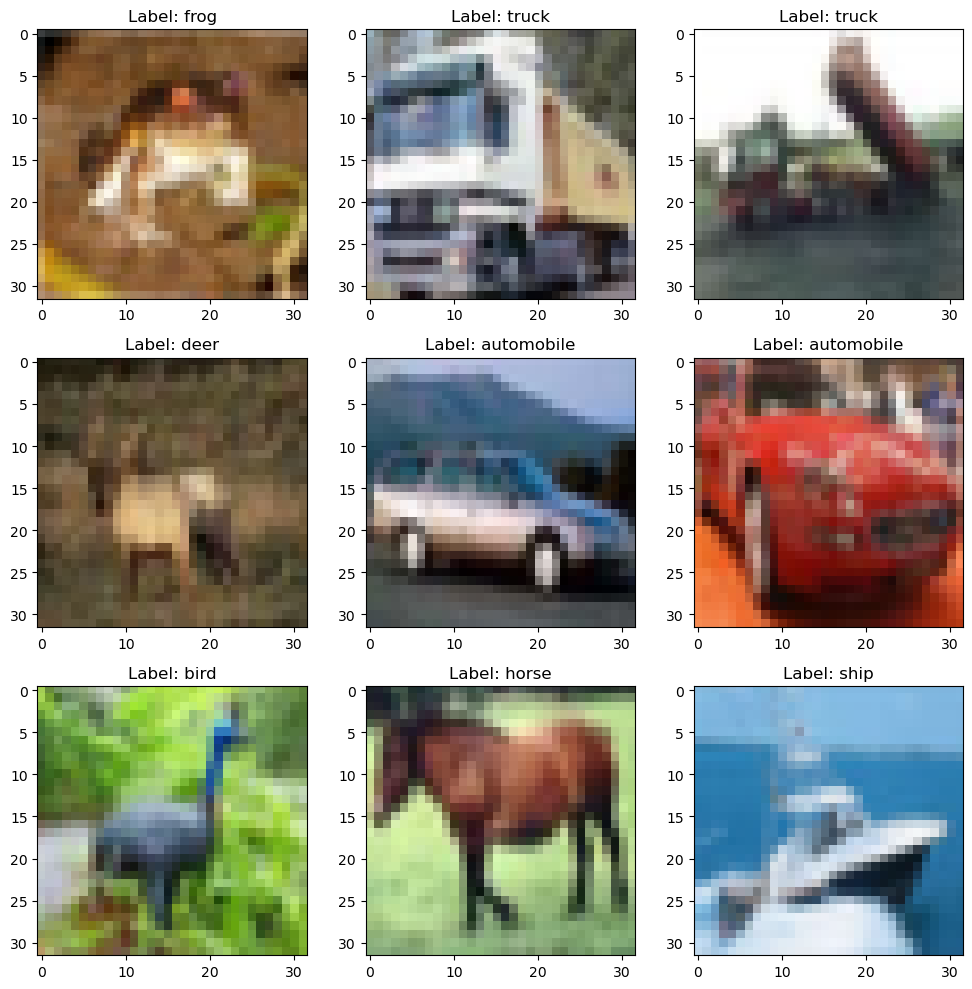

In [4]:
# Create a dictionary of CIFAR-10 classes for reference
cifar10_classes = {
    0: 'airplane', 
    1: 'automobile', 
    2: 'bird', 
    3: 'cat', 
    4: 'deer',
    5: 'dog', 
    6: 'frog', 
    7: 'horse', 
    8: 'ship', 
    9: 'truck'
}

# Plot a few images from the dataset
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(X_train[i])
    plt.title(f"Label: {cifar10_classes[y_train[i][0]]}")
plt.tight_layout()
plt.show()

In [13]:
# Preprocess the data
X_train = X_train.astype('float32') / 255.0
y_train = to_categorical(y_train, 10)
X_test = X_test.astype('float32') / 255.0
y_test = to_categorical(y_test, 10)

In [6]:
# Create an MLP model using Keras
mlp_model = Sequential()
mlp_model.add(Flatten(input_shape=X_train.shape[1:]))
mlp_model.add(Dense(512, activation='relu'))
mlp_model.add(Dense(256, activation='relu'))
mlp_model.add(Dense(10, activation='softmax'))
mlp_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:
# Train and evaluate the MLP classifier
mlp_model.fit(X_train, y_train, epochs=10, verbose=1)

Epoch 1/10


1563/1563 [==============================] - 19s 12ms/step - loss: 1.8642 - accuracy: 0.3285
Epoch 2/10
1563/1563 [==============================] - 18s 12ms/step - loss: 1.6601 - accuracy: 0.4075
Epoch 3/10
1563/1563 [==============================] - 18s 12ms/step - loss: 1.5874 - accuracy: 0.4336
Epoch 4/10
1563/1563 [==============================] - 18s 12ms/step - loss: 1.5381 - accuracy: 0.4494
Epoch 5/10
1563/1563 [==============================] - 19s 12ms/step - loss: 1.4974 - accuracy: 0.4639
Epoch 6/10
1563/1563 [==============================] - 19s 12ms/step - loss: 1.4719 - accuracy: 0.4761
Epoch 7/10
1563/1563 [==============================] - 19s 12ms/step - loss: 1.4491 - accuracy: 0.4811
Epoch 8/10
1563/1563 [==============================] - 19s 12ms/step - loss: 1.4234 - accuracy: 0.4905
Epoch 9/10
1563/1563 [==============================] - 21s 14ms/step - loss: 1.4051 - accuracy: 0.4983
Epoch 10/10
1563/1563 [==============================] - 22s 1

In [8]:
mlp_loss, mlp_accuracy = mlp_model.evaluate(X_test, y_test, verbose=0)
print(f"MLP Test Accuracy: {mlp_accuracy * 100:.2f}%")

MLP Test Accuracy: 47.85%


In [9]:
# Create a CNN model using Keras
cnn_model = Sequential()
cnn_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=X_train.shape[1:]))
cnn_model.add(MaxPooling2D((2, 2)))
cnn_model.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(MaxPooling2D((2, 2)))
cnn_model.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(Flatten())
cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dense(10, activation='softmax'))
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
# Train and evaluate the CNN classifier
cnn_model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 25s 14ms/step - loss: 1.5135 - accuracy: 0.4469
Epoch 2/10
1563/1563 [==============================] - 23s 14ms/step - loss: 1.1539 - accuracy: 0.5933
Epoch 3/10
1563/1563 [==============================] - 23s 15ms/step - loss: 1.0220 - accuracy: 0.6416
Epoch 4/10
1563/1563 [==============================] - 23s 14ms/step - loss: 0.9284 - accuracy: 0.6746
Epoch 5/10
1563/1563 [==============================] - 25s 16ms/step - loss: 0.8595 - accuracy: 0.6982
Epoch 6/10
1563/1563 [==============================] - 24s 15ms/step - loss: 0.8004 - accuracy: 0.7188
Epoch 7/10
1563/1563 [==============================] - 24s 15ms/step - loss: 0.7602 - accuracy: 0.7332
Epoch 8/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.7121 - accuracy: 0.7486
Epoch 9/10
1563/1563 [==============================] - 25s 16ms/step - loss: 0.6700 - accuracy: 0.7643
Epoch 10/10
1563/1563 [==============================] - 23s 15m

In [11]:
cnn_loss, cnn_accuracy = cnn_model.evaluate(X_test, y_test, verbose=0)
print(f"CNN Test Accuracy: {cnn_accuracy * 100:.2f}%")

CNN Test Accuracy: 70.64%


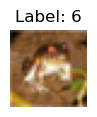

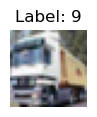

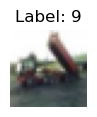

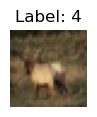

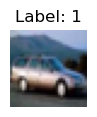

In [12]:
# Display a few images after CNN model development
for i in range(5):
    plt.figure(figsize=(1, 1))
    plt.imshow(X_train[i])
    plt.title(f"Label: {y_train[i].argmax()}")
    plt.axis('off')
    plt.show()



Based on the aforementioned code, perform the following activity:


1.   Using the provided code, create one distinct CNN models with architectures different from the one provided.


2.  Train the model with three different optimizers selected from the options available at https://keras.io/api/optimizers/.

3.  Measure the time it takes to train each model with its respective optimizer by importing the 'time' module and recording the start and end times using 'time.time()'.

4. Include this bar plot in your lab logbook to compare training times with different optimizers.

5. Strive to fine-tune the model parameters to achieve higher accuracy, ideally surpassing 90%. Document in your lab logbook the highest accuracy you have achieved through this fine-tuning process.

Epoch 1/10
1563/1563 [==============================] - 57s 36ms/step - loss: 1.7955 - accuracy: 0.3338 - val_loss: 1.4343 - val_accuracy: 0.4659
Epoch 2/10
1563/1563 [==============================] - 48s 30ms/step - loss: 1.3877 - accuracy: 0.5004 - val_loss: 1.1853 - val_accuracy: 0.5761
Epoch 3/10
1563/1563 [==============================] - 50s 32ms/step - loss: 1.1898 - accuracy: 0.5741 - val_loss: 1.0156 - val_accuracy: 0.6407
Epoch 4/10
1563/1563 [==============================] - 50s 32ms/step - loss: 1.0647 - accuracy: 0.6245 - val_loss: 0.9289 - val_accuracy: 0.6735
Epoch 5/10
1563/1563 [==============================] - 46s 30ms/step - loss: 0.9815 - accuracy: 0.6557 - val_loss: 0.8573 - val_accuracy: 0.6992
Epoch 6/10
1563/1563 [==============================] - 47s 30ms/step - loss: 0.9172 - accuracy: 0.6770 - val_loss: 0.8564 - val_accuracy: 0.7032
Epoch 7/10
1563/1563 [==============================] - 46s 29ms/step - loss: 0.8678 - accuracy: 0.6947 - val_loss: 0.8217 -

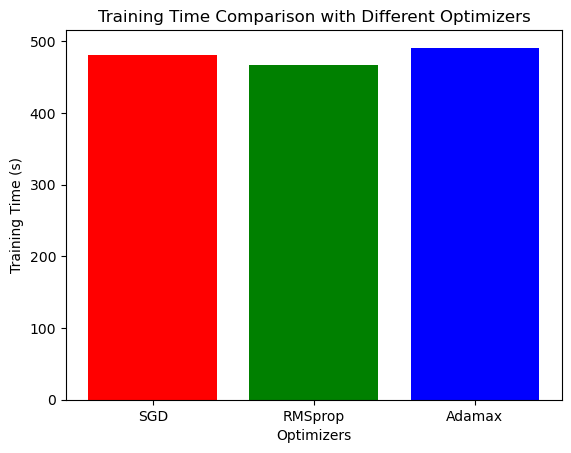

In [21]:
from keras.optimizers import SGD, RMSprop, Adamax
import time
from keras.utils import to_categorical

# Load the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
# Preprocess the data
X_train = X_train.astype('float32') / 255.0
y_train = to_categorical(y_train, 10)
X_test = X_test.astype('float32') / 255.0
y_test = to_categorical(y_test, 10)

# Define the CNN model architecture
def create_cnn_model():
    model = Sequential([
        Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=X_train.shape[1:]),
        Conv2D(32, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Dropout(0.25),

        Conv2D(64, (3, 3), padding='same', activation='relu'),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Dropout(0.25),

        Flatten(),
        Dense(512, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    return model

# List of optimizers to train with
optimizers = [SGD(lr=0.01, momentum=0.9), RMSprop(lr=0.001), Adamax(lr=0.002)]
optimizer_names = ['SGD', 'RMSprop', 'Adamax']
training_times = []

# Train and evaluate the model with different optimizers
for optimizer in optimizers:
    # Create a new model instance
    model = create_cnn_model()
    
    # Compile the model
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    
    # Record the start time
    start_time = time.time()
    
    # Train the model
    history = model.fit(X_train, y_train, epochs=10, verbose=1, validation_data=(X_test, y_test))
    
    # Record the end time
    end_time = time.time()
    
    # Calculate and store the training time
    training_time = end_time - start_time
    training_times.append(training_time)

# Plot the training times
plt.bar(optimizer_names, training_times, color=['red', 'green', 'blue'])
plt.xlabel('Optimizers')
plt.ylabel('Training Time (s)')
plt.title('Training Time Comparison with Different Optimizers')
plt.show()

In [26]:
model_accuracies = {}

# Extract accuracies for each optimizer
for opt_name in optimizer_names:
    model_accuracies[opt_name] = history.history['val_accuracy']  # or 'val_acc' for Keras < 2.3.0

# Display the accuracies
for opt_name, accuracies in model_accuracies.items():
    print(f"{opt_name} Validation Accuracy: {accuracies[-1] * 100:.2f}%")

SGD Validation Accuracy: 76.54%
RMSprop Validation Accuracy: 76.54%
Adamax Validation Accuracy: 76.54%


Lab Logbook Requirements:

1. Record the bar graph depicting the comparison of training times.
2. Record the final accuracy achieved.
